# 4. Merging species counts tables into one counts table for all species

In [1]:
import os
import pandas as pd
import numpy as np
# requires dammit env
# source activate dammit
from dammit.fileio.gff3 import GFF3Parser
%matplotlib inline
import pylab as plt
from matplotlib_venn import venn2

In [35]:
ncbi_counts_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/tximport_counts_ncbi/"
counts_matrices = os.listdir(ncbi_counts_dir)
print(counts_matrices)

['F_sciadicus_counts_ncbi.csv', 'L_goodei_counts_ncbi.csv', 'F_grandis_counts_ncbi.csv', 'F_notti_counts_ncbi.csv', '.DS_Store', 'F_olivaceous_counts_ncbi.csv', 'F_heteroclitusMDPL_counts_ncbi.csv', 'F_diaphanus_counts_ncbi.csv', 'F_catanatus_counts_ncbi.csv', 'F_zebrinus_counts_ncbi.csv', 'F_heteroclitusMDPP_counts_ncbi.csv', 'L_parva_counts_ncbi.csv', 'F_parvapinis_counts_ncbi.csv', 'A_xenica_counts_ncbi.csv', 'F_chrysotus_counts_ncbi.csv', 'F_similis_counts_ncbi.csv', 'F_notatus_counts_ncbi.csv', 'F_rathbuni_counts_ncbi.csv']


In [14]:
test = pd.read_csv(ncbi_counts_dir + 'F_catenatus_counts_ncbi.csv',sep="\t")
test = test.rename(columns={'Unnamed: 0': 'NCBI'})

In [15]:
test.head()

,NCBI,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant
0,NP_001296843.1,0.000,1.000,1.000,0.000,0.000,4.000,3.000
1,NP_001296844.1,28.256,86.994,58.977,18.483,80.846,91.054,106.395
2,NP_001296847.1,13.000,13.000,20.000,7.000,40.000,21.000,15.000
3,NP_001296848.1,1.000,0.000,0.000,0.000,0.000,0.000,3.000
4,NP_001296859.1,104.142,226.231,181.506,145.714,606.796,751.019,1510.907


20058


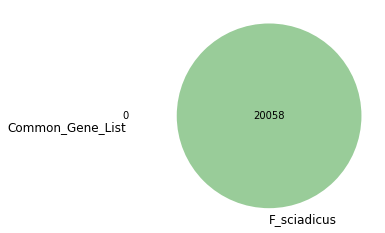

24748


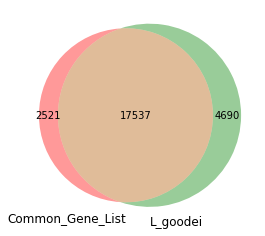

27597


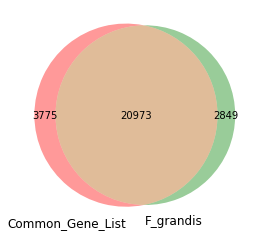

28232


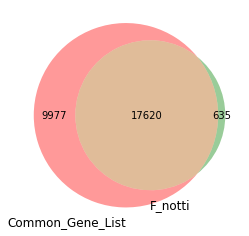

28954


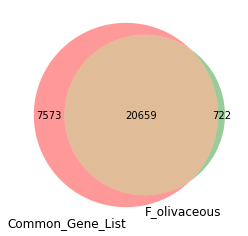

30009


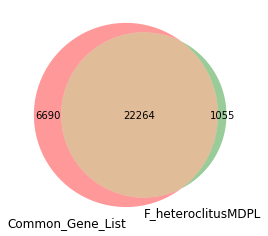

30341


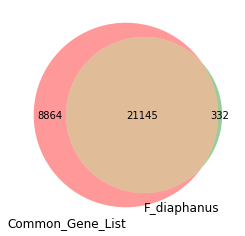

30687


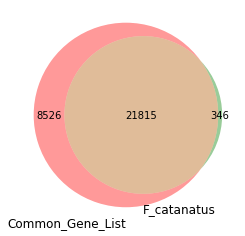

30870


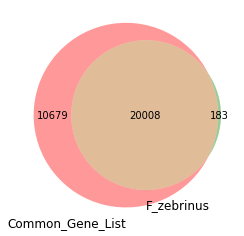

31145


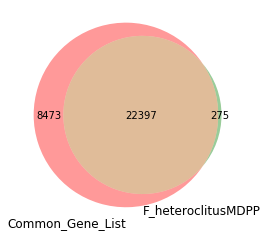

31350


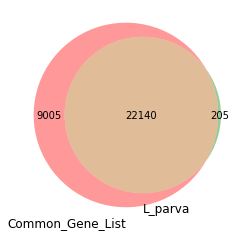

31501


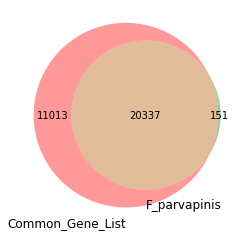

31665


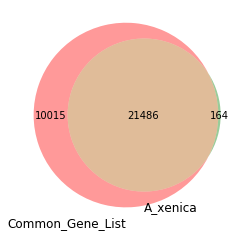

31855


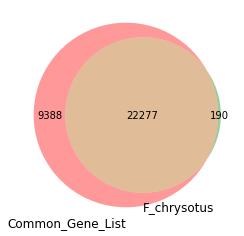

31982


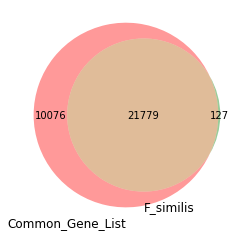

32091


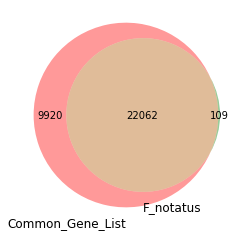

32217


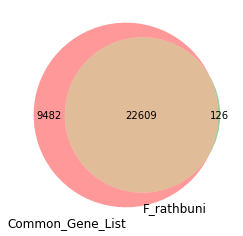

In [28]:
gene_list_common = []
# construct common gene list (union)
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(ncbi_counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'NCBI'})
        # if countsvalue is >5 in any column, then keep
        table_filt = table[(table.iloc[:,1:] > 5).any(1)]
        species_genes = table['NCBI'].tolist()
        #species_genes = [item for sublist in species_genes for item in sublist]
        a = set(species_genes)
        b = set(gene_list_common)
        gene_list_common = list(a | b)
        print(len(gene_list_common))
        gene_list_common.extend(gene_list_common)
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()
# construct unique gene list ()

In [29]:
print(len(gene_list_common))
print(len(set(gene_list_common)))

64434
32217


20058


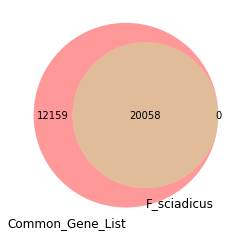

22227


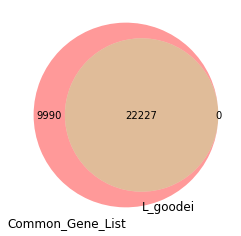

23822


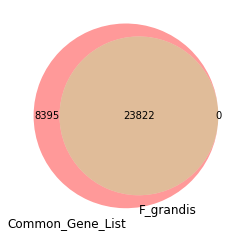

18255


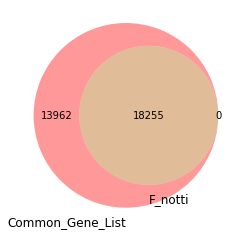

21381


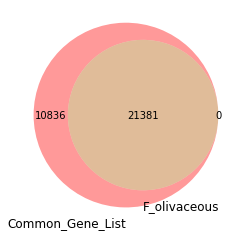

23319


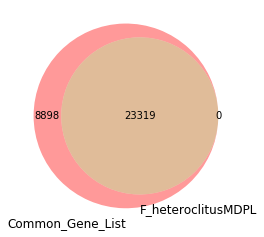

21477


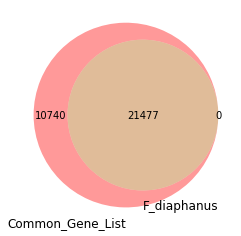

22161


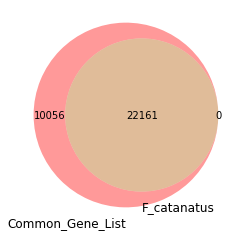

20191


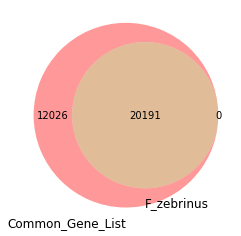

22672


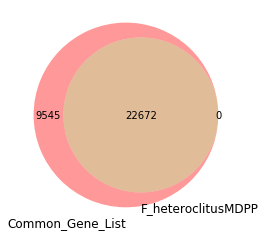

22345


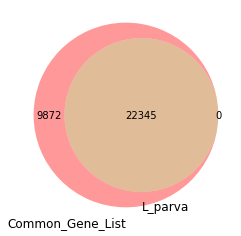

20488


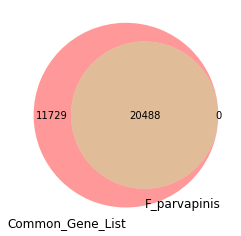

21650


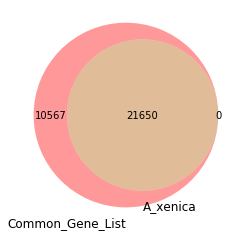

22467


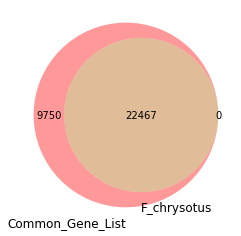

21906


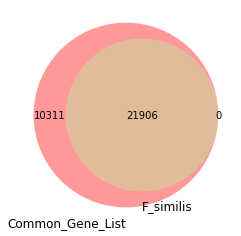

22171


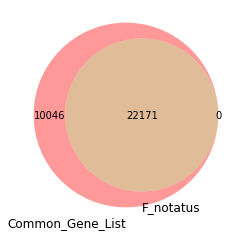

22735


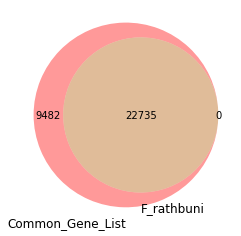

In [30]:
# only genes that are in common across all species
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(ncbi_counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'NCBI'})
        table_filt = table[(table.iloc[:,1:] > 5).any(1)]
        species_genes = table['NCBI'].tolist()
        a = set(species_genes)
        b = set(gene_list_common)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [31]:
print(counts_matrices)
print(len(counts_matrices))

['F_sciadicus_counts_ncbi.csv', 'L_goodei_counts_ncbi.csv', 'F_grandis_counts_ncbi.csv', 'F_notti_counts_ncbi.csv', '.DS_Store', 'F_olivaceous_counts_ncbi.csv', 'F_heteroclitusMDPL_counts_ncbi.csv', 'F_diaphanus_counts_ncbi.csv', 'F_catanatus_counts_ncbi.csv', 'F_zebrinus_counts_ncbi.csv', 'F_heteroclitusMDPP_counts_ncbi.csv', 'L_parva_counts_ncbi.csv', 'F_parvapinis_counts_ncbi.csv', 'A_xenica_counts_ncbi.csv', 'F_chrysotus_counts_ncbi.csv', 'F_similis_counts_ncbi.csv', 'F_notatus_counts_ncbi.csv', 'F_rathbuni_counts_ncbi.csv']
18


In [37]:
count = 0
gene_list_common = []
for genes_file1 in counts_matrices:
    if genes_file1.endswith(".csv"):
        species1 = genes_file1.split("_")[0]+"_"+genes_file1.split("_")[1]
        for genes_file2 in counts_matrices:
            if genes_file2 != genes_file1:
                if genes_file2.endswith(".csv"):
                    species2 = genes_file2.split("_")[0]+"_"+genes_file2.split("_")[1]
                    table1 = pd.read_csv(ncbi_counts_dir+genes_file1,sep="\t")
                    table1 = table1.rename(columns={'Unnamed: 0': 'NCBI'})
                    table1_filt = table1[(table1.iloc[:,1:] > 5).any(1)]
                    table2 = pd.read_csv(ncbi_counts_dir+genes_file2,sep="\t")
                    table2 = table2.rename(columns={'Unnamed: 0': 'NCBI'})
                    table2_filt = table2[(table2.iloc[:,1:] > 5).any(1)]
                    species_genes1 = table1_filt['NCBI'].tolist()
                    species_genes2 = table2_filt['NCBI'].tolist()
                    a = set(species_genes1)
                    b = set(species_genes2)
                    genes_list = list(a | b)
                    print(len(genes_list))
                    gene_list_common.extend(genes_list)
#difference=filter(lambda x:x not in list2,list1)

22852
24408
21133
22317
23772
22401
23088
21644
23306
23259
21943
22560
23327
22472
22955
23508
22852
24894
22497
23322
24465
23282
23799
22799
24028
23275
22999
23391
24066
23312
23769
24224
24408
24894
24100
24664
25291
24530
24924
24265
24851
25021
24462
24723
25241
24562
24930
25184
21133
22497
24100
21825
23395
21963
22617
20916
22796
22875
21275
22065
22793
21781
22605
23181
22317
23322
24664
21825
24148
23009
23440
22293
23675
23555
22546
22990
23665
22825
23013
23829
23772
24465
25291
23395
24148
24098
24521
23734
24034
24720
23815
24178
24919
23982
24571
24879
22401
23282
24530
21963
23009
24098
23438
22307
23522
23642
22554
23131
23849
22864
23480
23656
23088
23799
24924
22617
23440
24521
23438
22975
24138
24061
23162
23615
24225
23504
23872
24165
21644
22799
24265
20916
22293
23734
22307
22975
23099
23193
21780
22473
23260
22273
22931
23480
23306
24028
24851
22796
23675
24034
23522
24138
23099
24245
23320
23752
24469
23524
24120
24383
23259
23275
25021
22875
23555
24720
2364

In [38]:
gene_list_common_intersect = gene_list_common
print(len(gene_list_common_intersect))
print(len(set(gene_list_common)))
gene_list_common = list(set(gene_list_common))

6390678
31208


20019


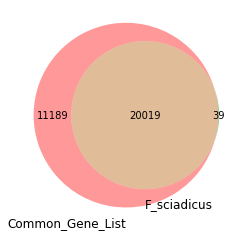

22098


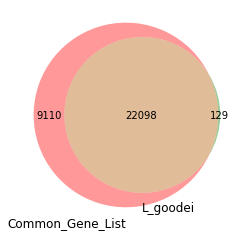

23567


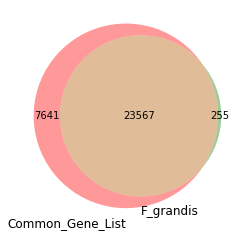

18221


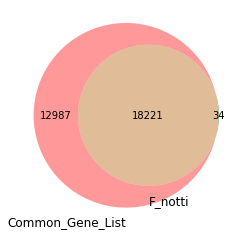

21283


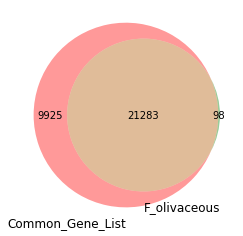

23117


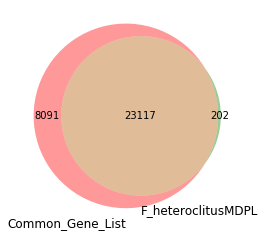

21401


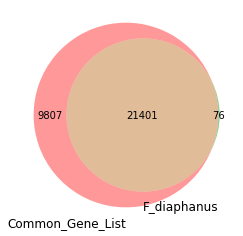

22047


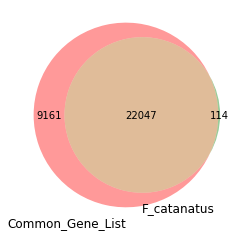

20142


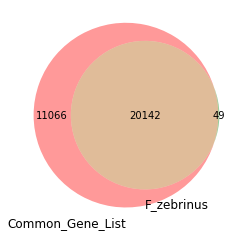

22534


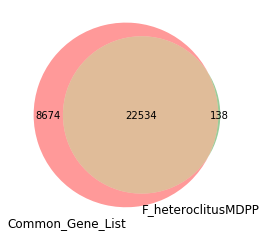

22236


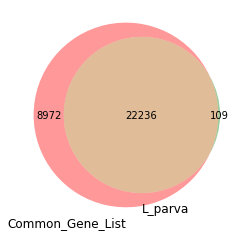

20412


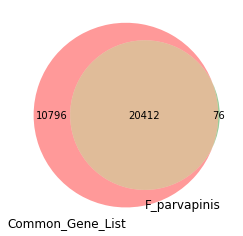

21561


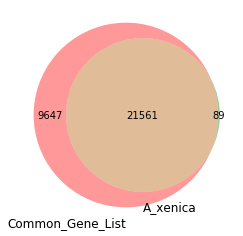

22352


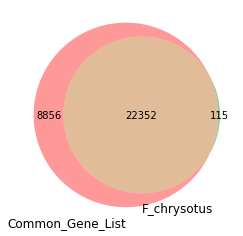

21786


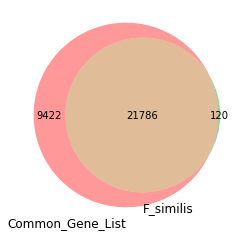

22073


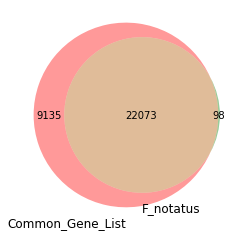

22610


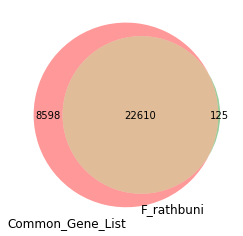

In [42]:
for genes_file in counts_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(ncbi_counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'NCBI'})
        species_genes = table['NCBI'].tolist()
        a = set(species_genes)
        b = set(gene_list_common_intersect)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [44]:
species_counts = pd.DataFrame()
species_counts['NCBI'] = ""  
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        print("========")
        print(species)
        print("========")
        table = pd.read_csv(ncbi_counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'NCBI'})
        counts = table[table['NCBI'].isin(gene_list_common)]
        cols = counts.columns.tolist()
        colnames = ['NCBI']
        for i in cols:
            if i.startswith(species):
                colnames.append(i)
        counts = counts[colnames]
        species_counts = pd.merge(species_counts,counts,on='NCBI',how='outer')
        print(species_counts.shape)

F_sciadicus
(20019, 5)
L_goodei
(24584, 14)
F_grandis
(27221, 23)
F_notti
(27829, 25)
F_olivaceous
(28488, 33)
F_heteroclitusMDPL
(29401, 42)
F_diaphanus
(29696, 48)
F_catanatus
(30005, 55)
F_zebrinus
(30170, 59)
F_heteroclitusMDPP
(30390, 68)
L_parva
(30553, 77)
F_parvapinis
(30672, 85)
A_xenica
(30802, 94)
F_chrysotus
(30957, 102)
F_similis
(31044, 111)
F_notatus
(31118, 120)
F_rathbuni
(31208, 129)


In [45]:
species_counts = species_counts.fillna(0)

In [46]:
species_counts.head()

,NCBI,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,L_goodei_BW_1.quant,L_goodei_BW_2.quant,L_goodei_BW_3.quant,L_goodei_FW_1.quant,L_goodei_FW_2.quant,...,F_notatus_transfer_3.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,F_rathbuni_FW_3.quant,F_rathbuni_transfer_1.quant,F_rathbuni_transfer_2.quant,F_rathbuni_transfer_3.quant
0,NP_001296841.1,621.000,128.000,81.000,234.000,188.528,291.836,189.509,286.505,87.655,...,398.606,271.887,247.704,237.727,338.573,1060.063,322.198,505.818,290.809,439.028
1,NP_001296842.1,15.000,12.000,1.000,16.000,79.000,129.000,52.000,185.000,39.000,...,12.000,106.000,74.000,108.075,85.000,395.613,94.000,219.039,135.000,107.100
2,NP_001296843.1,6899.603,2091.259,2245.314,5620.501,673.000,1639.000,1759.000,3598.000,678.000,...,141.000,2069.554,1583.496,1978.675,4004.009,6746.612,3396.608,3960.911,2067.901,3952.001
3,NP_001296844.1,2818.000,1859.000,1573.000,1346.000,4027.621,3196.844,3156.782,9508.868,2692.054,...,9603.000,2654.000,2981.000,7093.000,1289.000,23909.000,938.000,3453.000,1293.000,3034.000
4,NP_001296845.1,11.000,1.000,3.000,2.000,25.000,35.000,21.000,63.000,22.000,...,0.000,40.000,22.000,29.000,13.000,132.000,20.000,42.000,18.000,39.000


In [47]:
species_counts.shape

(31208, 129)

In [48]:
species_filt = species_counts[(species_counts.iloc[:,1:] > 5).any(1)]

In [49]:
species_filt.shape

(31208, 129)

In [50]:
species_counts.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/NCBI_species_counts.csv",index=False,index_label=None)

## Extra code leftover from NCBI annotations (don't use for OGs)

In [152]:
cols = species_protein_ID.columns.tolist()
colnames = ['NCBIproteinID','NCBIscaffold','product','gene']
for i in cols:
    if i.endswith(".quant"):
        colnames.append(i)
species_counts_real = species_protein_ID[colnames]

In [153]:
species_counts_real.shape

(27775, 132)

In [154]:
species_counts_real.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/16killifish_counts_RNAseq_filtered_16October2018.csv")

In [155]:
species_counts_real.head()
species_counts_real.shape

(27775, 132)

In [156]:
species_counts_test = species_counts_real

In [157]:
species_counts_real.shape

(27775, 132)

In [158]:
species_counts_test.shape

(27775, 132)

In [159]:
species_counts_real.head()

,NCBIproteinID,NCBIscaffold,product,gene,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant,A_xenica_BW_1.quant,A_xenica_BW_2.quant,A_xenica_BW_3.quant,A_xenica_FW_1.quant,A_xenica_FW_2.quant,A_xenica_FW_3.quant,A_xenica_transfer_1.quant,A_xenica_transfer_2.quant,A_xenica_transfer_3.quant,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant,L_goodei_BW_1.quant,L_goodei_BW_2.quant,L_goodei_BW_3.quant,L_goodei_FW_1.quant,L_goodei_FW_2.quant,L_goodei_FW_3.quant,L_goodei_transfer_1.quant,L_goodei_transfer_2.quant,L_goodei_transfer_3.quant,F_heteroclitusMDPP_BW_1.quant,F_heteroclitusMDPP_BW_2.quant,F_heteroclitusMDPP_BW_3.quant,F_heteroclitusMDPP_FW_1.quant,F_heteroclitusMDPP_FW_2.quant,F_heteroclitusMDPP_FW_3.quant,F_heteroclitusMDPP_transfer_1.quant,F_heteroclitusMDPP_transfer_2.quant,F_heteroclitusMDPP_transfer_3.quant,L_parva_BW_1.quant,L_parva_BW_2.quant,L_parva_BW_3.quant,L_parva_FW_1.quant,L_parva_FW_2.quant,L_parva_FW_3.quant,L_parva_transfer_1.quant,L_parva_transfer_2.quant,L_parva_transfer_3.quant,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,F_notatus_BW_1.quant,F_notatus_BW_2.quant,F_notatus_BW_3.quant,F_notatus_FW_1.quant,F_notatus_FW_2.quant,F_notatus_FW_3.quant,F_notatus_transfer_1.quant,F_notatus_transfer_2.quant,F_notatus_transfer_3.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,F_rathbuni_FW_3.quant,F_rathbuni_transfer_1.quant,F_rathbuni_transfer_2.quant,F_rathbuni_transfer_3.quant,F_heteroclitusMDPL_BW_1.quant,F_heteroclitusMDPL_BW_2.quant,F_heteroclitusMDPL_BW_3.quant,F_heteroclitusMDPL_FW_1.quant,F_heteroclitusMDPL_FW_2.quant,F_heteroclitusMDPL_FW_3.quant,F_heteroclitusMDPL_transfer_1.quant,F_heteroclitusMDPL_transfer_2.quant,F_heteroclitusMDPL_transfer_3.quant,F_olivaceous_BW_1.quant,F_olivaceous_BW_2.quant,F_olivaceous_BW_3.quant,F_olivaceous_FW_1.quant,F_olivaceous_FW_2.quant,F_olivaceous_FW_3.quant,F_olivaceous_transfer_1.quant,F_olivaceous_transfer_2.quant,F_grandis_BW_1.quant,F_grandis_BW_2.quant,F_grandis_BW_3.quant,F_grandis_FW_1.quant,F_grandis_FW_2.quant,F_grandis_FW_3.quant,F_grandis_transfer_1.quant,F_grandis_transfer_2.quant,F_grandis_transfer_3.quant,F_chrysotus_BW_1.quant,F_chrysotus_BW_2.quant,F_chrysotus_BW_3.quant,F_chrysotus_FW_1.quant,F_chrysotus_FW_2.quant,F_chrysotus_FW_3.quant,F_chrysotus_transfer_1.quant,F_chrysotus_transfer_2.quant,F_zebrinus_BW_1.quant,F_zebrinus_BW_2.quant,F_zebrinus_FW_1.quant,F_zebrinus_FW_2.quant,F_similis_BW_1.quant,F_similis_BW_2.quant,F_similis_BW_3.quant,F_similis_FW_1.quant,F_similis_FW_2.quant,F_similis_FW_3.quant,F_similis_transfer_1.quant,F_similis_transfer_2.quant,F_similis_transfer_3.quant,F_notti_FW_1.quant,F_notti_FW_2.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant
0,XP_012704699.1,NW_012224512.1,biogenesis of lysosome-related organelles comp...,bloc1s1,93.000000,116.000000,122.000001,153.00000,179.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,113.000000,216.000000,212.000000,83.000000,516.968541,397.000000,580.000000,100.000000,161.0,86.0,189.000000,57.0,38.999999,78.0,48.999999,101.0,277.294571,329.0,165.227518,250.0,143.160386,170.000000,110.590974,213.904699,159.000001,136.999999,104.000000,130.0,122.000000,150.999999,115.0,324.000001,324.000000,142.0,381.019700,107.280651,74.748687,145.885094,359.088367,129.000000,459.000000,91.000000,149.000000,266.000000,381.000000,173.000000,180.000000,243.0,199.000000,238.911172,298.000000,1033.000000,305.0,414.000000,175.000000,305.000000,262.000000,97.622057,27.0,133.0,

In [160]:
cols = species_counts_real.columns.tolist()

In [161]:
cols = cols[4:]

In [162]:
cols

['F_diaphanus_BW_1.quant',
 'F_diaphanus_BW_2.quant',
 'F_diaphanus_FW_2.quant',
 'F_diaphanus_FW_3.quant',
 'F_diaphanus_transfer_1.quant',
 'F_diaphanus_transfer_2.quant',
 'A_xenica_BW_1.quant',
 'A_xenica_BW_2.quant',
 'A_xenica_BW_3.quant',
 'A_xenica_FW_1.quant',
 'A_xenica_FW_2.quant',
 'A_xenica_FW_3.quant',
 'A_xenica_transfer_1.quant',
 'A_xenica_transfer_2.quant',
 'A_xenica_transfer_3.quant',
 'F_catanatus_BW_1.quant',
 'F_catanatus_BW_2.quant',
 'F_catanatus_BW_3.quant',
 'F_catanatus_FW_1.quant',
 'F_catanatus_FW_2.quant',
 'F_catanatus_transfer_1.quant',
 'F_catanatus_transfer_2.quant',
 'L_goodei_BW_1.quant',
 'L_goodei_BW_2.quant',
 'L_goodei_BW_3.quant',
 'L_goodei_FW_1.quant',
 'L_goodei_FW_2.quant',
 'L_goodei_FW_3.quant',
 'L_goodei_transfer_1.quant',
 'L_goodei_transfer_2.quant',
 'L_goodei_transfer_3.quant',
 'F_heteroclitusMDPP_BW_1.quant',
 'F_heteroclitusMDPP_BW_2.quant',
 'F_heteroclitusMDPP_BW_3.quant',
 'F_heteroclitusMDPP_FW_1.quant',
 'F_heteroclitusMDPP_

In [163]:
len(cols)

128

# Design rows

In [51]:
cols = species_counts.columns.tolist()

In [52]:
print(cols)

['NCBI', 'F_sciadicus_BW_1.quant', 'F_sciadicus_FW_1.quant', 'F_sciadicus_FW_2.quant', 'F_sciadicus_transfer_1.quant', 'L_goodei_BW_1.quant', 'L_goodei_BW_2.quant', 'L_goodei_BW_3.quant', 'L_goodei_FW_1.quant', 'L_goodei_FW_2.quant', 'L_goodei_FW_3.quant', 'L_goodei_transfer_1.quant', 'L_goodei_transfer_2.quant', 'L_goodei_transfer_3.quant', 'F_grandis_BW_1.quant', 'F_grandis_BW_2.quant', 'F_grandis_BW_3.quant', 'F_grandis_FW_1.quant', 'F_grandis_FW_2.quant', 'F_grandis_FW_3.quant', 'F_grandis_transfer_1.quant', 'F_grandis_transfer_2.quant', 'F_grandis_transfer_3.quant', 'F_notti_FW_1.quant', 'F_notti_FW_2.quant', 'F_olivaceous_BW_1.quant', 'F_olivaceous_BW_2.quant', 'F_olivaceous_BW_3.quant', 'F_olivaceous_FW_1.quant', 'F_olivaceous_FW_2.quant', 'F_olivaceous_FW_3.quant', 'F_olivaceous_transfer_1.quant', 'F_olivaceous_transfer_2.quant', 'F_heteroclitusMDPL_BW_1.quant', 'F_heteroclitusMDPL_BW_2.quant', 'F_heteroclitusMDPL_BW_3.quant', 'F_heteroclitusMDPL_FW_1.quant', 'F_heteroclitusMDP

In [53]:
clade_design = {"A_xenica":"Clade3","F_catanatus":"Clade1","F_chrysotus":"Clade3",
 "F_diaphanus":"Clade1","F_grandis":"Clade1","F_heteroclitusMDPL":"Clade1",
 "F_heteroclitusMDPP":"Clade1","F_notatus":"Clade3","F_notti":"Clade3",
 "F_olivaceous":"Clade3","F_parvapinis":"Clade2","F_rathbuni":"Clade1",
 "F_sciadicus":"Clade3","F_similis":"Clade1","F_zebrinus":"Clade3",
 "L_goodei":"Clade2","L_parva":"Clade2"}
combined_design = {"A_xenica":"M_Clade3","F_catanatus":"FW_Clade1","F_chrysotus":"BW_Clade3",
 "F_diaphanus":"BW_Clade1","F_grandis":"M_Clade1","F_heteroclitusMDPL":"M_Clade1",
 "F_heteroclitusMDPP":"M_Clade1","F_notatus":"FW_Clade3","F_notti":"FW_Clade3",
 "F_olivaceous":"FW_Clade3","F_parvapinis":"BW_Clade2","F_rathbuni":"FW_Clade1",
 "F_sciadicus":"FW_Clade3","F_similis":"M_Clade1","F_zebrinus":"M_Clade3",
 "L_goodei":"FW_Clade2","L_parva":"M_Clade2"}
phys_design = {"A_xenica":"M","F_catanatus":"FW","F_chrysotus":"BW",
 "F_diaphanus":"BW","F_grandis":"M","F_heteroclitusMDPL":"M",
 "F_heteroclitusMDPP":"M","F_notatus":"FW","F_notti":"FW",
 "F_olivaceous":"FW","F_parvapinis":"BW","F_rathbuni":"FW",
 "F_sciadicus":"FW","F_similis":"M","F_zebrinus":"M",
 "L_goodei":"FW","L_parva":"M"}

In [55]:
species_list = ['Empty']
physiology_list = ['Empty']
clade_list = ['Empty']
combined_list = ['Empty']
condition_list = ['Empty']
for col in cols:
    if col != "NCBI":
        species = col.split("_")[0]+"_"+col.split("_")[1]
        condition = col.split("_")[2]
        if condition == "BW":
            condition = "15_ppt"
        if condition == "FW":
            condition = "0.2_ppt"
        condition_list.append(condition)
        species_list.append(species)
        physiology = phys_design[species]
        physiology_list.append(physiology)
        clade = clade_design[species]
        clade_list.append(clade)
        design = combined_design[species]
        combined_list.append(design)
print(len(species_list))
print(len(physiology_list))
print(len(clade_list))
print(len(combined_list))
print(len(condition_list))

129
129
129
129
129


In [56]:
species_counts.columns

Index(['NCBI', 'F_sciadicus_BW_1.quant', 'F_sciadicus_FW_1.quant',
       'F_sciadicus_FW_2.quant', 'F_sciadicus_transfer_1.quant',
       'L_goodei_BW_1.quant', 'L_goodei_BW_2.quant', 'L_goodei_BW_3.quant',
       'L_goodei_FW_1.quant', 'L_goodei_FW_2.quant',
       ...
       'F_notatus_transfer_3.quant', 'F_rathbuni_BW_1.quant',
       'F_rathbuni_BW_2.quant', 'F_rathbuni_BW_3.quant',
       'F_rathbuni_FW_1.quant', 'F_rathbuni_FW_2.quant',
       'F_rathbuni_FW_3.quant', 'F_rathbuni_transfer_1.quant',
       'F_rathbuni_transfer_2.quant', 'F_rathbuni_transfer_3.quant'],
      dtype='object', length=129)

In [57]:
species_counts.shape

(31208, 129)

In [58]:
df = pd.DataFrame([species_list],columns=species_counts.columns)
df2 = pd.DataFrame([physiology_list],columns=species_counts.columns)
df3 = pd.DataFrame([clade_list],columns=species_counts.columns)
df4 = pd.DataFrame([combined_list],columns=species_counts.columns)
df5 = pd.DataFrame([condition_list],columns=species_counts.columns)
print(df.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
#df.head()
species_counts_real = species_counts.append(df)
species_counts_real = species_counts_real.append(df2)
species_counts_real = species_counts_real.append(df3)
species_counts_real = species_counts_real.append(df4)
species_counts_real = species_counts_real.append(df5)
print(species_counts_real.shape)

(1, 129)
(1, 129)
(1, 129)
(1, 129)
(1, 129)
(31213, 129)


In [59]:
pd.set_option('display.max_columns',500)
species_counts_real.tail(5)

,NCBI,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,L_goodei_BW_1.quant,L_goodei_BW_2.quant,L_goodei_BW_3.quant,L_goodei_FW_1.quant,L_goodei_FW_2.quant,L_goodei_FW_3.quant,L_goodei_transfer_1.quant,L_goodei_transfer_2.quant,L_goodei_transfer_3.quant,F_grandis_BW_1.quant,F_grandis_BW_2.quant,F_grandis_BW_3.quant,F_grandis_FW_1.quant,F_grandis_FW_2.quant,F_grandis_FW_3.quant,F_grandis_transfer_1.quant,F_grandis_transfer_2.quant,F_grandis_transfer_3.quant,F_notti_FW_1.quant,F_notti_FW_2.quant,F_olivaceous_BW_1.quant,F_olivaceous_BW_2.quant,F_olivaceous_BW_3.quant,F_olivaceous_FW_1.quant,F_olivaceous_FW_2.quant,F_olivaceous_FW_3.quant,F_olivaceous_transfer_1.quant,F_olivaceous_transfer_2.quant,F_heteroclitusMDPL_BW_1.quant,F_heteroclitusMDPL_BW_2.quant,F_heteroclitusMDPL_BW_3.quant,F_heteroclitusMDPL_FW_1.quant,F_heteroclitusMDPL_FW_2.quant,F_heteroclitusMDPL_FW_3.quant,F_heteroclitusMDPL_transfer_1.quant,F_heteroclitusMDPL_transfer_2.quant,F_heteroclitusMDPL_transfer_3.quant,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant,F_zebrinus_BW_1.quant,F_zebrinus_BW_2.quant,F_zebrinus_FW_1.quant,F_zebrinus_FW_2.quant,F_heteroclitusMDPP_BW_1.quant,F_heteroclitusMDPP_BW_2.quant,F_heteroclitusMDPP_BW_3.quant,F_heteroclitusMDPP_FW_1.quant,F_heteroclitusMDPP_FW_2.quant,F_heteroclitusMDPP_FW_3.quant,F_heteroclitusMDPP_transfer_1.quant,F_heteroclitusMDPP_transfer_2.quant,F_heteroclitusMDPP_transfer_3.quant,L_parva_BW_1.quant,L_parva_BW_2.quant,L_parva_BW_3.quant,L_parva_FW_1.quant,L_parva_FW_2.quant,L_parva_FW_3.quant,L_parva_transfer_1.quant,L_parva_transfer_2.quant,L_parva_transfer_3.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant,A_xenica_BW_1.quant,A_xenica_BW_2.quant,A_xenica_BW_3.quant,A_xenica_FW_1.quant,A_xenica_FW_2.quant,A_xenica_FW_3.quant,A_xenica_transfer_1.quant,A_xenica_transfer_2.quant,A_xenica_transfer_3.quant,F_chrysotus_BW_1.quant,F_chrysotus_BW_2.quant,F_chrysotus_BW_3.quant,F_chrysotus_FW_1.quant,F_chrysotus_FW_2.quant,F_chrysotus_FW_3.quant,F_chrysotus_transfer_1.quant,F_chrysotus_transfer_2.quant,F_similis_BW_1.quant,F_similis_BW_2.quant,F_similis_BW_3.quant,F_similis_FW_1.quant,F_similis_FW_2.quant,F_similis_FW_3.quant,F_similis_transfer_1.quant,F_similis_transfer_2.quant,F_similis_transfer_3.quant,F_notatus_BW_1.quant,F_notatus_BW_2.quant,F_notatus_BW_3.quant,F_notatus_FW_1.quant,F_notatus_FW_2.quant,F_notatus_FW_3.quant,F_notatus_transfer_1.quant,F_notatus_transfer_2.quant,F_notatus_transfer_3.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,F_rathbuni_FW_3.quant,F_rathbuni_transfer_1.quant,F_rathbuni_transfer_2.quant,F_rathbuni_transfer_3.quant
0,Empty,F_sciadicus,F_sciadicus,F_sciadicus,F_sciadicus,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_notti,F_notti,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_zebrinus,F_zebrinus,F_zebrinus,F_zebrinus,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitu

In [60]:
species_counts_real.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/NCBI_species_counts_designfactors.csv")

In [61]:
species_counts_real.shape

(31213, 129)